In [ ]:
## OpenSoundscape RIBBIT tutorial
# http://opensoundscape.org/en/latest/tutorials/RIBBIT_pulse_rate_demo.html

## Setup 

In [176]:
# suppress warnings
import warnings
warnings.simplefilter('ignore')

#import packages
import numpy as np
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt
import subprocess
from datetime import datetime


#local imports from opensoundscape
from opensoundscape.audio import Audio
from opensoundscape.spectrogram import Spectrogram
from opensoundscape.ribbit import ribbit

# create big visuals
plt.rcParams['figure.figsize']=[15,8]
pd.set_option('display.precision', 2)

## Set parameters 

In [396]:
# minimum and maximum rate of pulsing (pulses per second) to search for
pulse_rate_range = [20,27]

# look for a vocalization in the range of 1000-2000 Hz
signal_band = [600,800]

# subtract the amplitude signal from these frequency ranges
#noise_bands = [ [0,200], [1500,2000]]
noise_bands = [[0,10]]

#divides the signal into segments this many seconds long, analyzes each independently
clip_duration = 0.5 #seconds
clip_overlap = 0 #seconds

#if True, it will show the power spectrum plot for each audio segment
show_plots = True

## Analyzing files from pond 400, 2020

In [446]:
test= 0
for i in range(0,100):
    test = test + 1
    if test % 10 == 0:
        print(test)

10
20
30
40
50
60
70
80
90
100


In [447]:
# set up a dataframe for storing files' scores and labels
df = pd.DataFrame(index = glob('/Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_398/*'),columns=['score','label'])

# label is 1 if the file contains a Great Plains Toad vocalization, and 0 if it does not
# df['label'] = [1 if 'Lcapito' in f else 0 for f in df.index]
#noise_bands = [[0,10]]

# calculate RIBBIT scores

start_time = datetime.now()
checkpoint = 0; 
for path in df.index:
    
    #make the spectrogram
    spec = Spectrogram.from_audio(audio.from_file(path))

    #run RIBBIT
    score_df =  ribbit(
                        spec,
                        pulse_rate_range=pulse_rate_range,
                        signal_band=signal_band,
                        clip_duration=clip_duration,
                        #noise_bands=noise_bands,
                        plot=False)

    # use the maximum RIBBIT score from any window as the score for this file
    # multiply the score by 10,000 to make it easier to read
    maxIndex= score_df.score.idxmax()
    
    df.at[path,'score'] = score_df.at[maxIndex, 'score'] * 10000
    df.at[path,'time_stamp'] = score_df.at[maxIndex, 'start_time']
    checkpoint = checkpoint + 1
    
    if checkpoint % 100 == 0:
        print("Finished file number ", checkpoint, "/nFile name: ", path)
        df.to_csv('flsh_398_2020_ribbit_scores.csv') 

    
print('Time elapsed ',datetime.now - start_time)

print("Files sorted by score, from highest to lowest:")
df.sort_values(by='score',ascending=False)

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

Finished file number  100 /nFile name:  /Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_398/TEST_0+1_20200123_210100.wav


/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

KeyboardInterrupt: 

In [401]:
flshe_400_2020_df = df

In [419]:
flshe_400_2020_df.to_csv('flsh_400_2020_ribbit_scores.csv') 

Text(0.5, 1.0, 'RIBBIT scores')

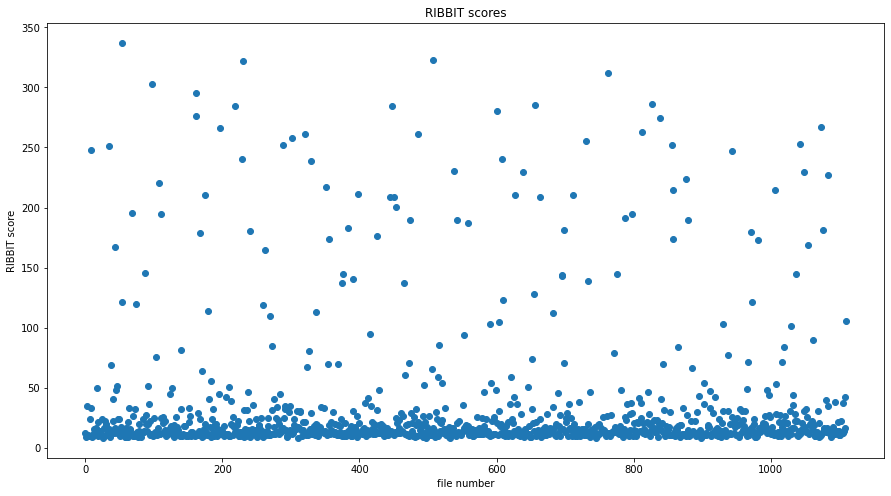

In [405]:
# plot the score vs time of each window
plt.scatter(range(0,len(flshe_400_2020_df)),flshe_400_2020_df['score'])
plt.xlabel('file number')
plt.ylabel('RIBBIT score')
plt.title('RIBBIT scores')


In [418]:
flshe_400_2020_df[flshe_400_2020_df['score']<100].sort_values(by='score',ascending=False).head(30)
#flshe_400_2020_df.filter(regex = '202003', axis = 0).sort_values(by='score',ascending=False).head(60)

,score,label,time_stamp
./FLSHE_2020_400/TEST_0+1_20200314_024407.wav,303.08,0,246.5
./FLSHE_2020_400/TEST_0+1_20200311_224200.wav,285.72,0,168.5
./FLSHE_2020_400/TEST_0+1_20200312_024200.wav,252.07,0,32.5
./FLSHE_2020_400/TEST_0+1_20200311_014200.wav,230.34,0,291.5
./FLSHE_2020_400/TEST_0+1_20200310_214200.wav,200.57,0,254.5
./FLSHE_2020_400/TEST_0+1_20200311_194200.wav,183.18,0,61.0
./FLSHE_2020_400/TEST_0+1_20200312_004200.wav,181.19,0,113.5
./FLSHE_2020_400/TEST_0+1_20200313_234400.wav,173.72,0,258.5
./FLSHE_2020_400/TEST_0+1_20200313_224400.wav,168.92,0,175.5
./FLSHE_2020_400/TEST_0+1_20200312_234300.wav,145.53,0,78.5
